In [1]:
# Let's first parse the log file content into a Python dictionary. 
# The dictionary will be structured with datasets as keys and a sub-dictionary as values, 
# where the sub-dictionary will have checkpoints as keys and scores as values.

log_file_content = """
8w_ste_sft_ckpt250-hellaswag: 0.765982871938
8w_ste_sft_ckpt250-swag: 0.769369189243
8w_ste_sft_ckpt250-boolq: 0.751376146789
8w_ste_sft_ckpt250-xwinograd_en: 0.882580645161
8w_ste_sft_ckpt250-winogrande: 0.692975532755
8w_ste_sft_ckpt500-hellaswag: 0.768771161123
8w_ste_sft_ckpt500-swag: 0.76966909927
"""

with open('/home/data/compression/quik_cache/summary_4w_quik.txt', 'r') as f:
    log_file_content = ''.join(f.readlines())



In [2]:

# Parse the log content
data = {}
for line in log_file_content.strip().split("\n"):
    parts = line.split(":")
    key, score = parts[0], float(parts[1].strip())
    ckpt, dataset = key.rsplit("-", 1)
    if dataset not in data:
        data[dataset] = {}
    data[dataset][ckpt] = score

# Now we will plot the progress over checkpoints for each dataset
import matplotlib.pyplot as plt


In [3]:
data

{'hellaswag': {'4w_ste_sft_quik_ckpt50': 0.743278231428,
  '4w_ste_sft_quik_ckpt1500': 0.746265684127,
  '4w_ste_sft_quik_ckpt1750': 0.746066520613,
  '4w_ste_sft_quik_ckpt750': 0.746365265883,
  '4w_ste_sft_quik_ckpt650': 0.745170284804,
  '4w_ste_sft_quik_ckpt150': 0.750248954392,
  '4w_ste_sft_quik_ckpt200': 0.747261501693,
  '4w_ste_sft_quik_ckpt1000': 0.74556861183,
  '4w_ste_sft_quik_ckpt1100': 0.74736108345,
  '4w_ste_sft_quik_ckpt350': 0.747759410476,
  '4w_ste_sft_quik_ckpt500': 0.746365265883,
  '4w_ste_sft_quik_ckpt1200': 0.746664011153,
  '4w_ste_sft_quik_ckpt1650': 0.746365265883,
  '4w_ste_sft_quik_ckpt1300': 0.74646484764,
  '4w_ste_sft_quik_ckpt850': 0.745070703047,
  '4w_ste_sft_quik_ckpt800': 0.744971121291,
  '4w_ste_sft_quik_ckpt1250': 0.747560246963,
  '4w_ste_sft_quik_ckpt100': 0.745767775344,
  '4w_ste_sft_quik_ckpt1800': 0.746265684127,
  '4w_ste_sft_quik_ckpt1350': 0.746564429397,
  '4w_ste_sft_quik_ckpt300': 0.747958573989,
  '4w_ste_sft_quik_ckpt1150': 0.7469

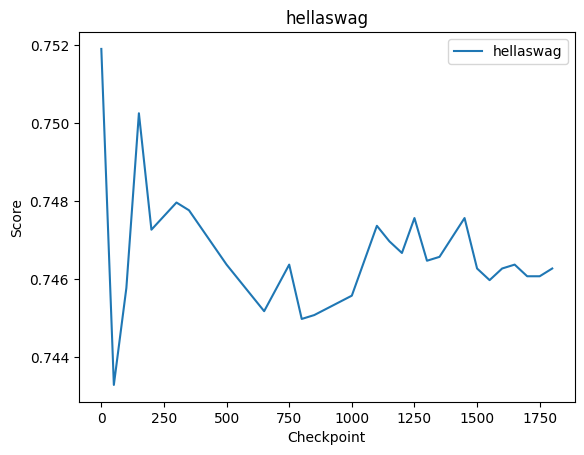

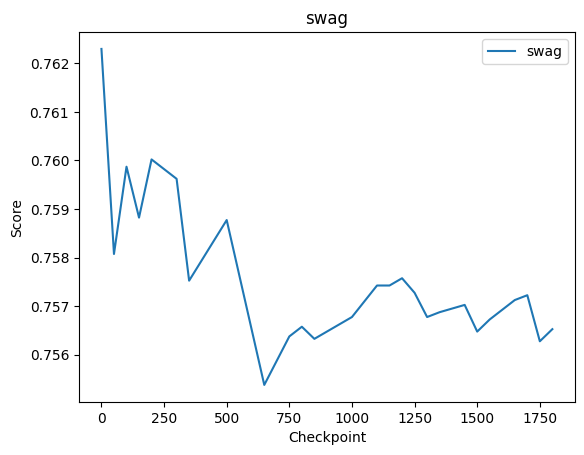

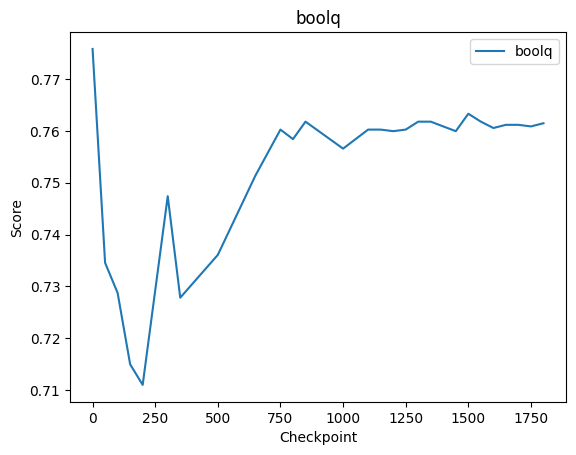

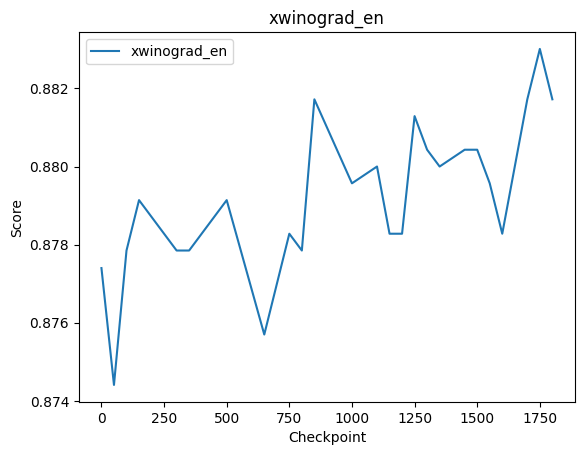

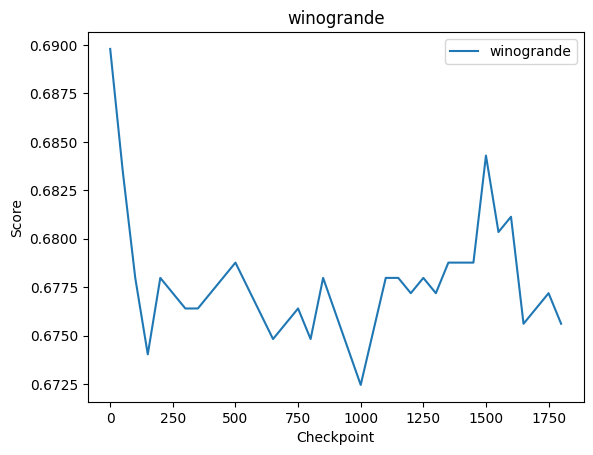

In [6]:
baseline_scores = {
    "winogrande": 0.6898,
    "boolq": 0.7758,
    "hellaswag": 0.7519,
    "swag": 0.7623,
    "xwinograd_en": 0.8774
}


for dataset, ckpts in data.items():
    # Sort checkpoints by their numerical value for proper plotting
    sorted_ckpts = sorted(ckpts.items(), key=lambda x: int(x[0].split("ckpt")[-1]))
    checkpoints = [int(ckpt[0].split("ckpt")[-1]) for ckpt in sorted_ckpts]
    scores = [ckpt[1] for ckpt in sorted_ckpts]

    checkpoints.insert(0, 0)
    scores.insert(0, baseline_scores[dataset])

    plt.plot(checkpoints, scores, label=dataset)
    plt.xlabel("Checkpoint")
    plt.ylabel("Score")
    plt.title(f"{dataset}")
    plt.legend()
    plt.show()
